$$\LARGE\textbf{Statistics for Artificial Intelligence & Data Science}$$

$$\Large\textbf{London Underground Travel Patterns}$$

$$\large\textbf{Daniel Elston}$$

$$\newline$$

$\large\textbf{Part 1: Calculating Morning and Evening Peak Proportions}$

In [1]:
import pandas as pd

In [2]:
load = pd.read_csv('hourlyExits.csv', index_col='Station')
load

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


In [3]:
df = load[['H07','H08', 'H09', 'H16', 'H17', 'H18']]
df

,H07,H08,H09,H16,H17,H18
Station,,,,,,
Acton Town,710,812,448,634,917,1077
Aldgate,1319,3076,3013,721,1116,1155
Aldgate East,1192,3045,3381,935,1263,1605
Alperton,230,372,254,444,679,724
Amersham,82,246,96,364,409,692
...,...,...,...,...,...,...
Wimbledon Park,173,192,132,283,364,467
Wood Green,450,831,884,1554,2334,2606
Wood Lane,441,594,763,455,665,646


In [4]:
total_exits_daily = pd.DataFrame().assign(Total = load.apply(sum, axis=1))

In [5]:
am_exits = load['H07']+load['H08']+load['H09']
pm_exits = load['H16']+load['H17']+load['H18']

In [6]:
am_peak = am_exits.sum()
pm_peak = pm_exits.sum()

In [7]:
peak_counts = pd.DataFrame().assign(AM_Peak = am_exits, PM_Peak = am_exits)
peak_counts

,AM_Peak,PM_Peak
Station,,
Acton Town,1970,1970
Aldgate,7408,7408
Aldgate East,7618,7618
Alperton,856,856
Amersham,424,424
...,...,...
Wimbledon Park,497,497
Wood Green,2165,2165
Wood Lane,1798,1798


In [8]:
df2 = df.assign(Total_am_exits = am_exits,
                Total_pm_exits = pm_exits,
               Total_exits_daily = total_exits_daily)

In [9]:
df2 = df2[['Total_am_exits', 'Total_pm_exits', 'Total_exits_daily']]
df2

,Total_am_exits,Total_pm_exits,Total_exits_daily
Station,,,
Acton Town,1970,2628,9362
Aldgate,7408,2992,16136
Aldgate East,7618,3803,21206
Alperton,856,1847,5118
Amersham,424,1465,3905
...,...,...,...
Wimbledon Park,497,1114,3296
Wood Green,2165,6494,18989
Wood Lane,1798,1766,6610


In [10]:
df2['Normalised_am_exits'] = df2['Total_am_exits']/df2['Total_exits_daily']
df2['Normalised_pm_exits'] = df2['Total_pm_exits']/df2['Total_exits_daily']
df2.round(3)

,Total_am_exits,Total_pm_exits,Total_exits_daily,Normalised_am_exits,Normalised_pm_exits
Station,,,,,
Acton Town,1970,2628,9362,0.210,0.281
Aldgate,7408,2992,16136,0.459,0.185
Aldgate East,7618,3803,21206,0.359,0.179
Alperton,856,1847,5118,0.167,0.361
Amersham,424,1465,3905,0.109,0.375
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.151,0.338
Wood Green,2165,6494,18989,0.114,0.342
Wood Lane,1798,1766,6610,0.272,0.267


- The above table shows the total AM exits, PM exits and then daily exits over all hours. The far right two columns show the AM and PM exits as a proportion of the total daily exits. Dividng by a common variable normalises the data which can be plotted with overall, more clarity.

 $$\newline$$

$\large\textbf{Part 2: Plotting and Analysing Distributions}$

array([[<AxesSubplot:title={'center':'Normalised_pm_exits'}>]],
      dtype=object)

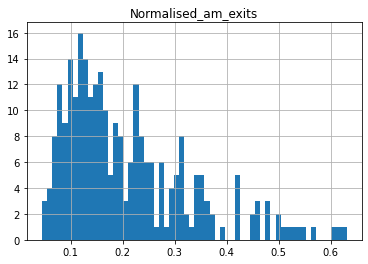

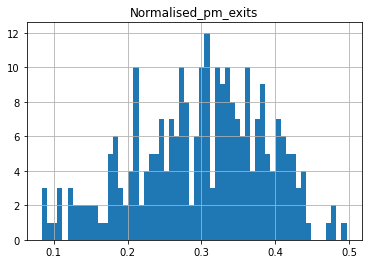

In [11]:
df2.hist(column='Normalised_am_exits', bins=60)
df2.hist(column='Normalised_pm_exits', bins=60)

array([[<AxesSubplot:title={'center':'Total_pm_exits'}>]], dtype=object)

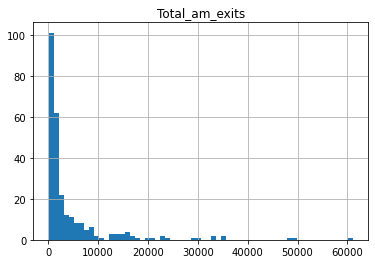

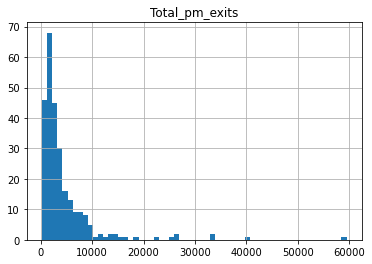

In [12]:
df2.hist(column='Total_am_exits', bins=60)
df2.hist(column='Total_pm_exits', bins=60)

- It is intuitive that the majority of stations will have fewer exits in the AM and be more spreadout in the PM. 
- Fewer exits in the majoirty of AM stations indicates there are many areas of work, with relatively small numbers of employees, or potentially people returning home after night shifts.
- The spread of the PM graph indicates that homes are spread quite evenly throughout London, with higher and lower exceptions.
- A low area of homes, would likely have a high number of work spaces and vise versa.
- A nice way to show the above statements would be through the use of a heat map of London, where places of many workspaces (no matter the size of work force) would be highlighted red. Applying a heat map to this data would likely show that the stations in the <0.2 range would fall within the outer transport zones, with a lesser population of work. The range 0.2-0.5 would fall in the 1-3 zones, with the >0.5 range falling in the central zone 1.
- The range of >0.5 is quite suprising to the people unfamiliar with the London tubes such as myself, but after investigating, such high volumes of exits are likely due to interlink stations.
- It is also intuitive that normalised PM exits would have a more symmetric, even distribution, suggesting a more even spread of station exits throughout the London area.
- It could be concluded that the busy stations in the AM are close to popular work areas, while the less busy are close to places of work with small workforces, if close to work spaces at all.
- Furthermore, the busy stations in the PM are closer to the popular living areas and the low exit stations in the PM are closer to large places of work.

In [13]:
df2.describe().round(3)

,Total_am_exits,Total_pm_exits,Total_exits_daily,Normalised_am_exits,Normalised_pm_exits
count,268.000,268.000,268.000,268.000,268.000
mean,4549.769,4477.556,17194.478,0.207,0.299
std,8181.784,6276.463,23480.190,0.122,0.088
min,27.000,239.000,596.000,0.045,0.085
25%,677.500,1471.750,4889.500,0.116,0.241
50%,1517.000,2622.000,9210.000,0.169,0.307
75%,4315.250,4707.750,19999.500,0.266,0.362
max,61116.000,59486.000,149258.000,0.630,0.496


- The mean for the total AM and PM exits looks reasonable, however removing certain anomalies (included in the cell below), will improve the overall error.
- Whats more informative is that, on average, 75% of the stations have less than 4512 exits, and 50% of stations have less than 2070 exits, regarding AM and PM total exits.
- The standard deviation is relatively large, indicating a disperse dataset.

In [14]:
anomaly = df2.loc[(df2['Total_pm_exits']>30000)]
anomaly.round(3)

,Total_am_exits,Total_pm_exits,Total_exits_daily,Normalised_am_exits,Normalised_pm_exits
Station,,,,,
King's Cross St. Pancras,32811,40637,146793,0.224,0.277
Liverpool Street,35177,33631,111897,0.314,0.301
Victoria,29241,33581,122970,0.238,0.273
Waterloo,23129,59486,149258,0.155,0.399


$$\newline$$

$\large\textbf{Part 3: A Simple Classification of Tables}$

In [15]:
rat_work = df2['Total_am_exits'] / df2['Total_pm_exits']
rat_home = df2['Total_pm_exits'] / df2['Total_am_exits']

In [16]:
ratio_table = df2.assign(Ratio_work = rat_work.round(3), Ratio_home = rat_home.round(3))

In [17]:
ratio_table.loc[ratio_table['Ratio_work'] >= 3, 'Work, Home or Other?'] = 'Work'
ratio_table.loc[ratio_table['Ratio_home'] >= 3, 'Work, Home or Other?'] = 'Home'
ratio_table.loc[ratio_table['Ratio_work'] < 3, 'Work, Home or Other?'] = 'Home'
ratio_table.loc[ratio_table['Ratio_home'] < 3, 'Work, Home or Other?'] = 'Work'
ratio_table.loc[ratio_table['Ratio_work'] < 1.5, 'Work, Home or Other?'] = 'Other'
ratio_table.loc[ratio_table['Ratio_home'] < 1.5, 'Work, Home or Other?'] = 'Other'
ratio_table.loc[ratio_table['Ratio_work'] < 0.5, 'Work, Home or Other?'] = 'Home'
ratio_table.loc[ratio_table['Ratio_home'] < 0.5, 'Work, Home or Other?'] = 'Work'
ratio_table.round(3)

,Total_am_exits,Total_pm_exits,Total_exits_daily,Normalised_am_exits,Normalised_pm_exits,Ratio_work,Ratio_home,"Work, Home or Other?"
Station,,,,,,,,
Acton Town,1970,2628,9362,0.210,0.281,0.750,1.334,Other
Aldgate,7408,2992,16136,0.459,0.185,2.476,0.404,Work
Aldgate East,7618,3803,21206,0.359,0.179,2.003,0.499,Work
Alperton,856,1847,5118,0.167,0.361,0.463,2.158,Home
Amersham,424,1465,3905,0.109,0.375,0.289,3.455,Home
...,...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.151,0.338,0.446,2.241,Home
Wood Green,2165,6494,18989,0.114,0.342,0.333,3.000,Home
Wood Lane,1798,1766,6610,0.272,0.267,1.018,0.982,Other


- The table above shows the classification of stations. High numbers of AM exits are likely to be working hotspots while high numbers of PM exits are likely to be highly residential areas. 
- The other category is reserved for ratios between 0.5 and 1.5, which are difficult to classify. 
- I decided on these parameters as they seem to be 'obvious' categories. For example, clearly those with work ratios above 3 are most likely working hotspots and vise versa. Furthermore, if the work ratio is less than 0.5 it is most likely residential.
- The other category is decided based from 1:1 ratios. A 1:1 ratio gives us no hint to wether it is a residential or work hotspot. A range of 0.5 - 1.5 was decided as it is quite close to 1:1, but has enough range to include other ambiguous result.

In [18]:
enquirey = ratio_table.loc[['Archway','Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square', 
'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']]
enquirey.round(3)

,Total_am_exits,Total_pm_exits,Total_exits_daily,Normalised_am_exits,Normalised_pm_exits,Ratio_work,Ratio_home,"Work, Home or Other?"
Station,,,,,,,,
Archway,2190,4106,13935,0.157,0.295,0.533,1.875,Other
Balham,2637,7635,22128,0.119,0.345,0.345,2.895,Home
Embankment,10692,8829,33781,0.317,0.261,1.211,0.826,Other
Goodge Street,5374,1949,12817,0.419,0.152,2.757,0.363,Work
Highgate,893,3170,8921,0.100,0.355,0.282,3.550,Home
High Barnet,987,2362,6843,0.144,0.345,0.418,2.393,Home
Leicester Square,8952,12915,47772,0.187,0.270,0.693,1.443,Other
Morden,1550,5955,15680,0.099,0.380,0.260,3.842,Home
South Wimbledon,1335,2198,7197,0.185,0.305,0.607,1.646,Other


- Archway: Expected higher home ratio from looking at map.
- Balham: I dont think there are many areas of populated work around Brixton, so any stations in this area are likely to home.
- Embankment: The difference in ratio was quite surprising, as its very central. I would expect work ratio value to be far higher.
- Goodge Street: Very central again, expected high work ratio, this could be the reason for the low result previously. This could be the more popular station.
- Highgate: North of the centre and quite rural, expected result home.
- High Barnet: Being quite north of the centre again, it is expected that the home ratio would be higher.
- Leicester Square: Quite a famous place, probably popular with tourists, agreeing with the Other criteria. It is unlikely tourists are visiting during the AM/PM hours we are analysing.
- Morden: Very south of the centre and quite rural, expected a high home ratio.
- South Wimbledon: Expected high ratio of home, suprisingly it is close to the Other catergory, looking at the map there are no obvious reasons for this.
- Tottenham Court Road: Very central, expected high work ratio, however there are Universities and hospitals nearby which could effect results.
- Warren Street: I would expect a similar result to the above. This is not the case and is quite puzzling why. It is however closer to the universities, so maybe it is frequented by students in the mornings more often than the previous stations.